# Assignment 1: Ensemble Methods

<b>Objective:</b> To build, evaluate, and compare and contrast ensemble models with standard machine learning models. You should demonstrate an understanding of each model's pros and cons and evaluate, from a business context, which model is most appropriate.

Initially, we'll import the necessary libraries and functions. In our analysis, we aim to assess ensemble models against both our custom ensemble and a baseline model. To facilitate this comparison, we'll bring in the following models: Random Forest, AdaBoost, BaggingClassifier, and VotingClassifier. Additionally, we will evaluate the performance of a Logistic Regression and KNN model. Furthermore, we'll utilize the Decision Tree model as a component in constructing our bespoke ensemble.

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time # to measure how long the models take
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

## Part 1: Data Preprocessing

- Download the Term Marketing - Banking data set from the following link: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets 
- Clean and explore the data. Summarize your findings.
- Build a pipeline to process the data (i.e., One Hot Encoding, Scaling, and any other relevant transformations)
- Explain your pre-processing approach and justify the transformations you have made.

In [2]:
# read the Banking data set
data = pd.read_csv('https://raw.githubusercontent.com/Lily-QianWang/schulich_data_science/main/train.csv', sep = ';')

In [3]:
df = data
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Checking the summary of our main dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
# Check the statistic information about this dataset.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [7]:
# Checking missing values
df.isnull().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [8]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

#### Exploratory Data Analysis

Categorical Variables

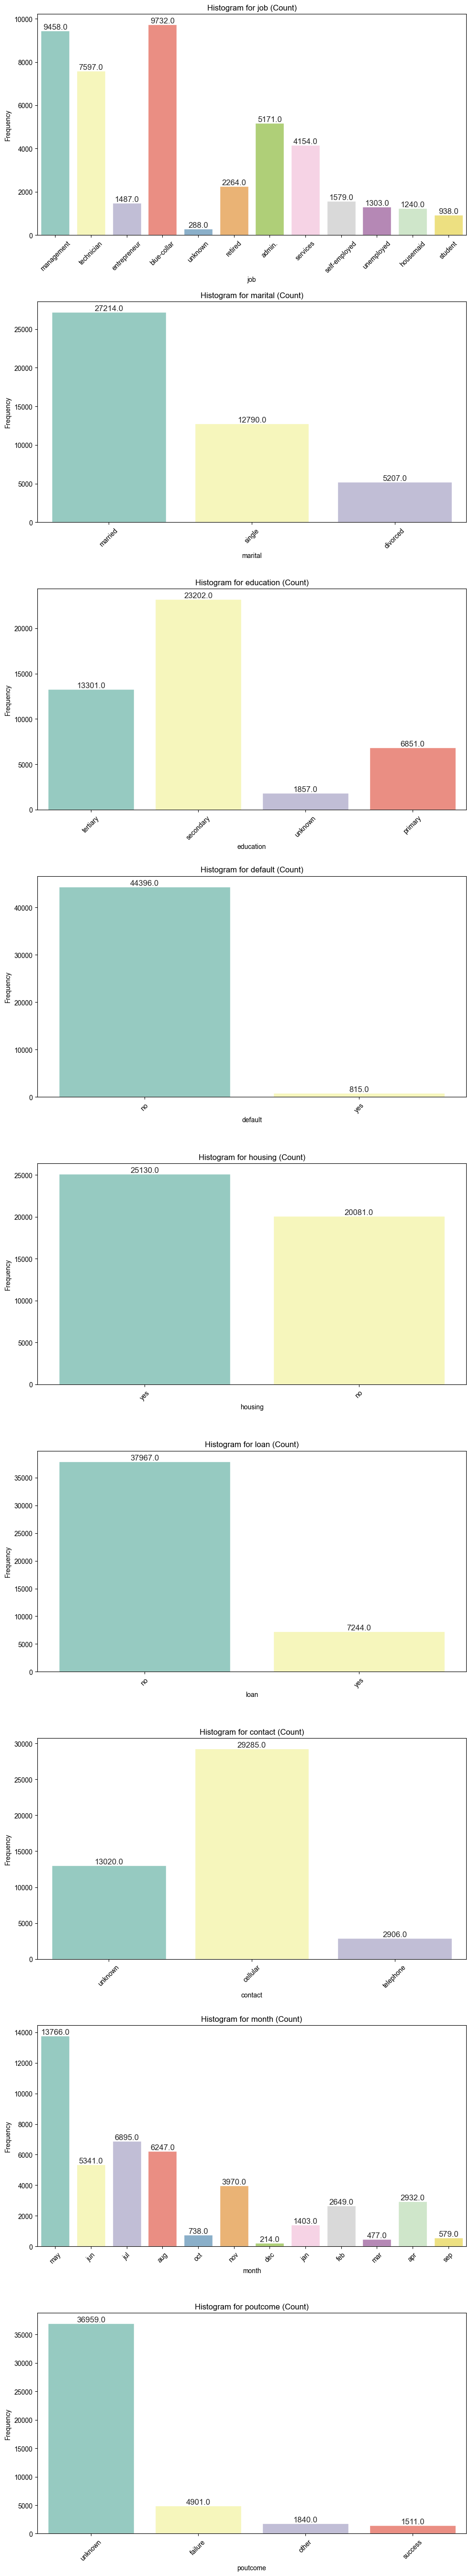

In [9]:
# Set up the subplots for nice visualization
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 6 * len(cat_cols)))

# Loop through each categorical variable and create a histogram with count labels
for i, column in enumerate(cat_cols):
    sns.set(style="whitegrid")
    
    # Create a countplot
    ax = sns.countplot(data=df, x=column, palette="Set3", ax=axes[i])
    
    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    ax.set_title(f'Histogram for {column} (Count)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

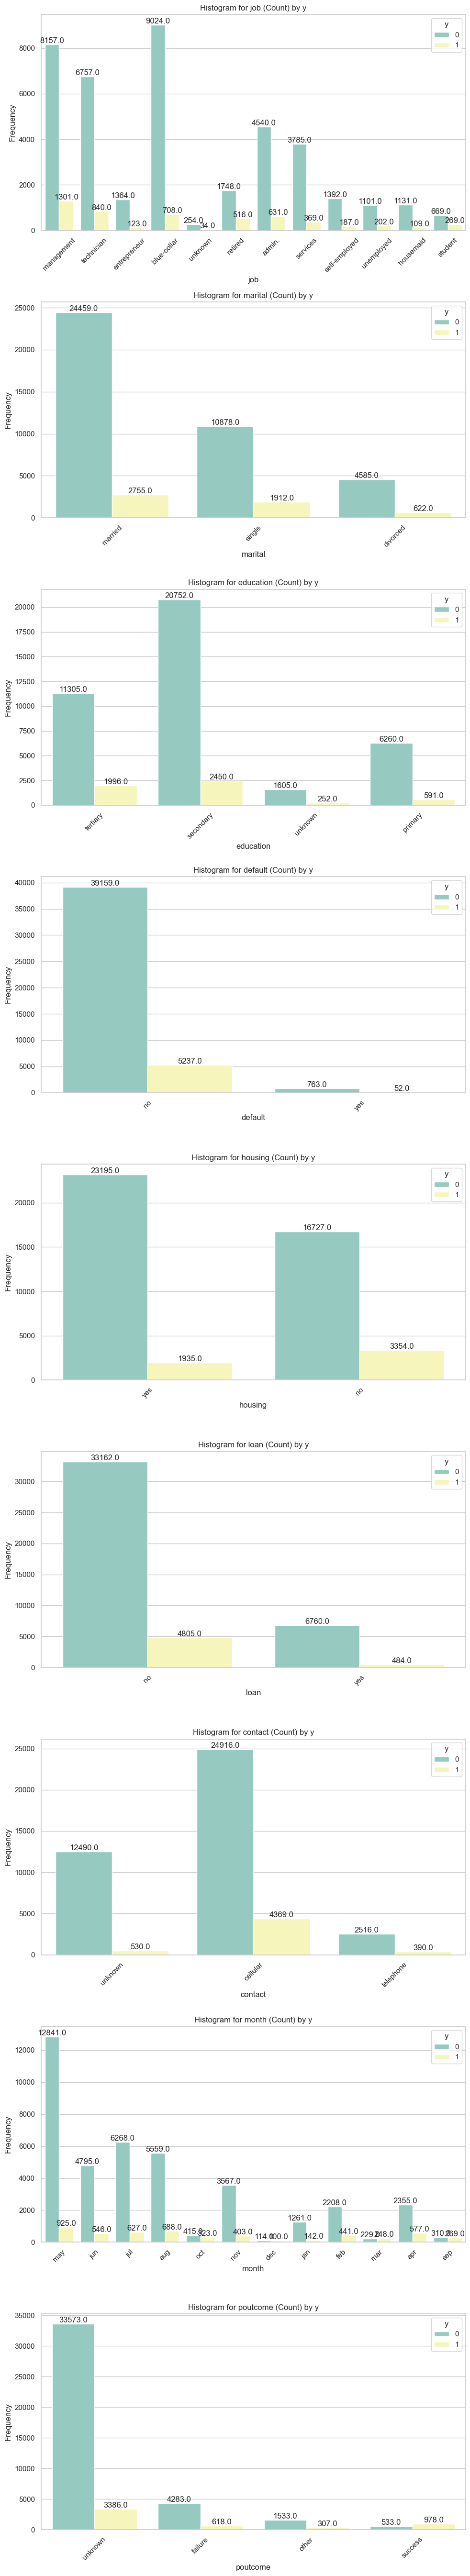

In [10]:
# Set up subplots for nice visualization
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 6 * len(cat_cols)))

# Loop through each categorical variable and create a histogram with count labels and hue
for i, column in enumerate(cat_cols):
    sns.set(style="whitegrid")
    
    # Create a countplot with hue
    ax = sns.countplot(data=df, x=column, hue="y", palette="Set3", ax=axes[i])
    
    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    ax.set_title(f'Histogram for {column} (Count) by y')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='y')
    
plt.tight_layout()
plt.show()

Numerical Variables

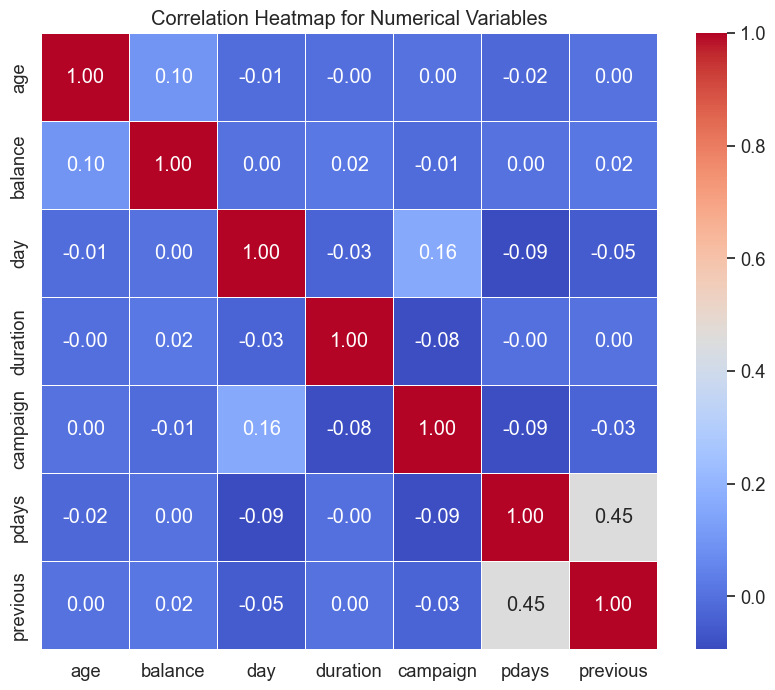

In [11]:
# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", square=True)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

In [12]:
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


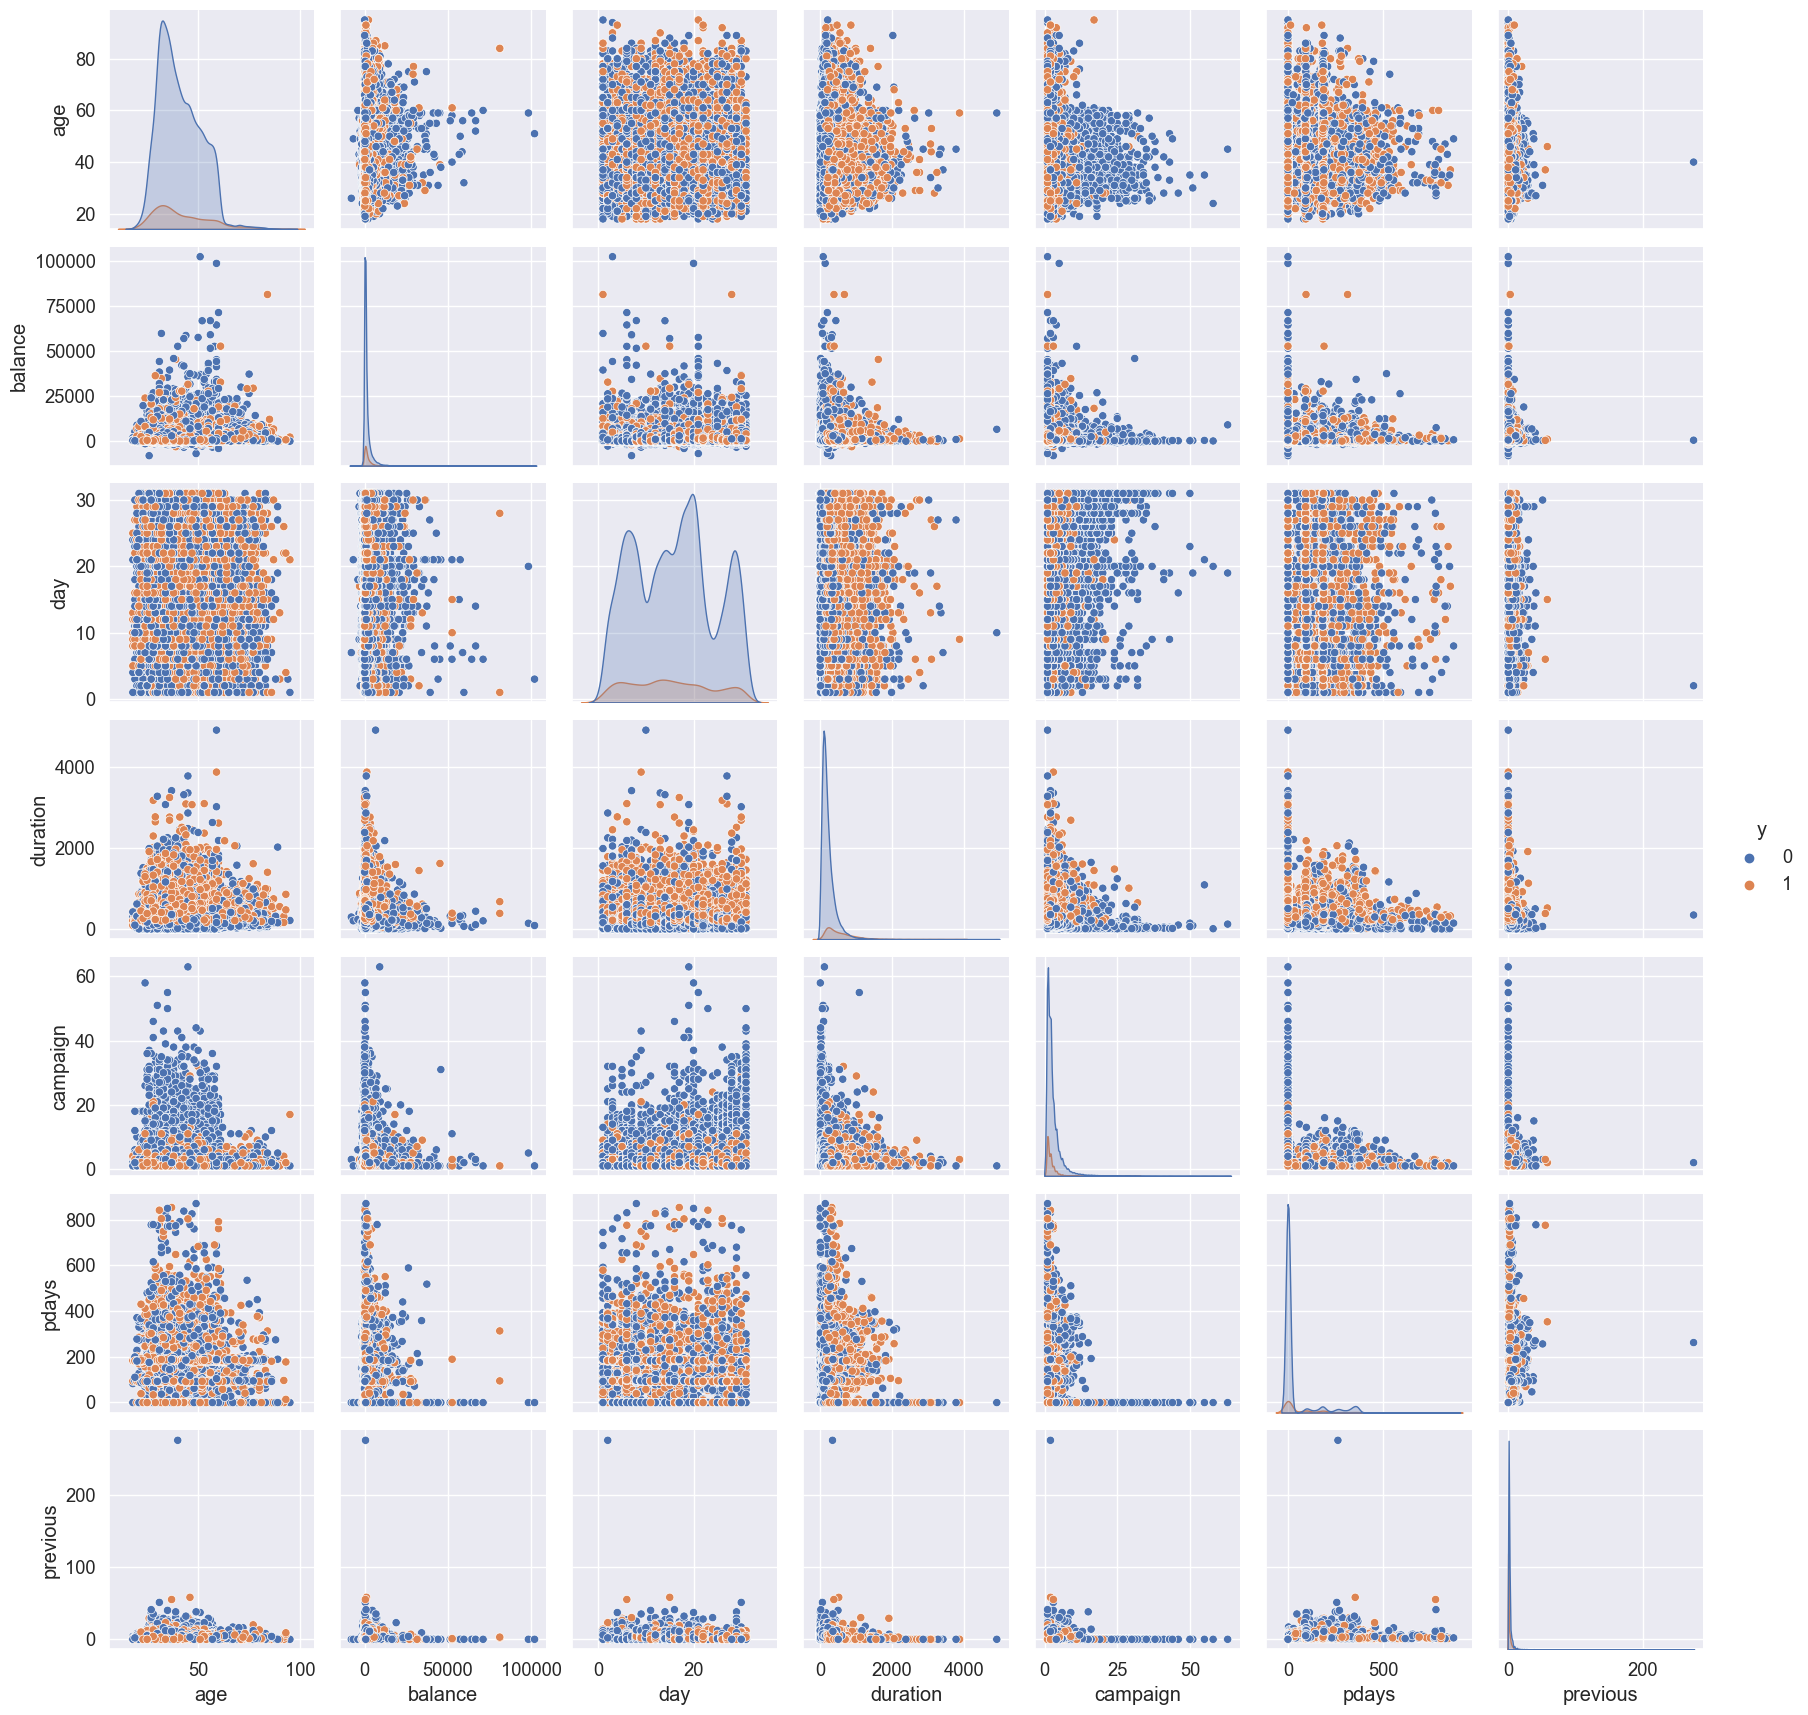

In [13]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

<b>Key findings from the analysis of categorical and numerical variables:</b>

1. The 'Default' variable does not influence whether the client subscribes to a term deposit.
    - Note: The 'duration' attribute significantly affects the target output (e.g., if duration=0, then y="no"). However, since the duration is not known before a call and is obviously known after the call, it should only be included for benchmarking purposes and discarded when aiming for a realistic predictive model.
2. The 'Default' variable has no impact on the client's subscription to a term deposit.
3. Regarding the 'Campaign' variable, if the number of contacts made during a campaign for a single client exceeds 23, there is a high likelihood that the client will not subscribe to a term deposit. Even with more than 8 contacts, the probability remains low.

In [14]:
df = data.drop(['duration','default','campaign'], axis=1)

In [15]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

A fundamental point on the training Pipeline of Machine Learning models is, with no doubts, the dataset split in training and testing sets. This allows us to optimize the model with one set and validate with another unseen set.


In [ ]:
# This code prepares a binary target variable 'y' by replacing 'yes' with 1 and 'no' with 0, and creates a feature matrix 'X' by removing the 'y' column from the DataFrame 'df'.
y = df["y"]
y.replace(('yes', 'no'), (1, 0), inplace=True) 
X = df.drop("y", axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Part 2: Build Baseline Models

- Create baseline models using logistic regression and k-NN. Tune the models.
- Evaluate these models using the performance metrics you deem appropriate.

## Part 3: Ensemble Modelling [6 marks]
1. Random Forest
    - Build a Random Forest model.
    - Tune hyperparameters.

2. AdaBoost
    - Build an AdaBoost model.
    - Tune hyperparameters.
3. Bagging Classifier
    - Build a Bagging Classifier with a base estimator of your choice.
    - Tune hyperparameters.

4. Voting Classifier
    - Build a Voting Classifier using a mix of at least three different classification models.
    - Experiment with both hard and soft voting.


In [17]:
# Set up models to compare with adding some initial parameters

knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [18]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [19]:
# Create dictionary to store the results of each model
results = {}

In [20]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.646651  0.279720  0.390516  0.903351  1.923173
Logistic Regression   0.639194  0.348651  0.451196  0.906115  0.918420
Decision Tree         0.494416  0.486513  0.490433  0.888090  0.663467
Random Forest         0.658307  0.419580  0.512508  0.911644  8.574206
AdaBoost              0.641892  0.379620  0.477087  0.907885  2.694282
Bagging               0.592490  0.425574  0.495349  0.904014  4.203817
Voting                0.645793  0.329670  0.436508  0.905783  2.084604


In [21]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [23]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}
#voting_params = {'classifier__voting': ['hard', 'soft'], 'classifier__weights': [[1, 1], [2, 1], [1, 2]]}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }     

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

                                                           Best Params  \
K-Nearest Neighbors                    {'classifier__n_neighbors': 50}   
Logistic Regression                               {'classifier__C': 1}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 20, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'hard'}   

                    Precision    Recall  F1-Score    Time (s)  
K-Nearest Neighbors  0.671271  0.242757  0.356566   37.595668  
Logistic Regression  0.639194  0.348651  0.451196    8.502025  
Decision Tree        0.578019  0.425574  0.490219   12.934652  
Random Forest        0.659574  0.402597       0.5  418.536475  
AdaBoost             0.644828  0.373626  0.473118   37.998467  
Bagging              0.

## Part 4: Performance Comparison
- Compare the performance of all models (including the baseline models). Consider both the time required for the models to run, and the performance of the models on the data set.


In summary, the choice of the best model depends on your specific goals and trade-offs between precision, recall, and computational time. Logistic Regression seems to strike a good balance in terms of performance and efficiency. Random Forest and Bagging have competitive performance but are computationally expensive. KNN and Decision Tree may require further tuning to improve their recall. AdaBoost and Voting offer reasonable performance but with some trade-offs. Consider the specific requirements of your task when selecting the most suitable model.

## Part 5: Interpretation and Justification
1. <b>Why did the ensemble models perform the way they did?</b>
    - Beyond the hyperparameters, use your understanding of how the models work to explain why you think the models performed they way they did on the given data set. Was the result what you were expecting? Why or why not?
    
Ensemble models like Random Forest, AdaBoost, Bagging, and Voting are designed to improve predictive performance by combining the outputs of multiple base models. Here's an analysis of their performance:

- <b>Random Forest:</b> Random Forest generally performs well because it builds multiple decision trees and aggregates their predictions. However, it requires more computational time due to the complexity of the ensemble, which is reflected in the longer runtime. In this case, it achieved a reasonable balance between precision and recall.

- <b>AdaBoost:</b> AdaBoost focuses on correcting the errors of previous models. It tends to perform well when the base models are weak, but it still requires moderate computational resources. It achieved reasonable precision and recall.

- <b>Bagging:</b> Bagging builds multiple models in parallel and aggregates their results. It is computationally expensive but tends to provide good precision and recall. In this case, it performed well in terms of precision and recall but took more time.

- <b>Voting:</b> Voting combines the predictions of multiple models. It may not always outperform individual models, as it depends on the diversity and quality of the base models. In this case, it had decent precision but lower recall.

These ensemble models are generally expected to provide better performance than individual models, but they come at the cost of increased computational complexity.

2. <b>If you had to pick one model to implement in business process, which would it be and why?</b>
    - Discuss the business implications.
    - Consider not only performance metrics but also computational cost and interpretability.

The choice of the model depends on the specific business requirements and constraints:

- <b>Logistic Regression:</b> If computational cost is a concern, Logistic Regression could be a suitable choice. It offers a good balance between precision and recall and runs quickly. It is also interpretable, which is valuable when the business needs to understand the factors driving predictions.

- <b>Random Forest or Bagging:</b> If computational resources are not a major constraint, and a slightly better F1-Score is desired, Random Forest or Bagging could be considered. They provide competitive performance but at the cost of longer execution times. The choice between them would depend on the exact trade-offs and requirements.

3. <b>What decision criteria did you use to arrive at this conclusion?</b>
    - Precision-Recall trade-off? Computational cost? Others?
    
The decision criteria for choosing a model should consider the following factors:
- <b>Performance Metrics:</b> Consider precision, recall, and F1-Score based on the business's priorities. If one metric is more critical (e.g., precision for reducing false positives), prioritize models that excel in that metric.
- <b>Computational Cost:</b> Assess the available computational resources. If time is a critical factor, prioritize models with shorter execution times.
- <b>Interpretability:</b> If the business needs to understand why a particular prediction was made, choose models like Logistic Regression, which are interpretable and provide insights into feature importance.
- <b>Business Implications:</b> Consider how the model's predictions will be used in the business process. Are there specific constraints or requirements that make one model more suitable than another?

The decision should be made based on a trade-off analysis, considering these factors in the context of the specific business problem and resources available.